# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_key}&units={units}&q="

In [4]:
#create empty lists as variable to hold data per cities list index

lat = []
temp = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
name = []

In [5]:
response = requests.get(query_url + city).json()

In [6]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        lat.append(response["coord"]["lat"])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        name.append(response['name'])
    except KeyError:
        print("City Not Found")
        pass
        
    response = requests.get(query_url + city).json()
    print(response)

{'coord': {'lon': 57.7, 'lat': -20.4081}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.09, 'feels_like': 70.23, 'temp_min': 70.09, 'temp_max': 70.25, 'pressure': 1023, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1659303797, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1659321577, 'sunset': 1659361880}, 'timezone': 14400, 'id': 934322, 'name': 'Mahébourg', 'cod': 200}
{'coord': {'lon': -27.9833, 'lat': 39.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.75, 'feels_like': 73.2, 'temp_min': 72.75, 'temp_max': 72.75, 'pressure': 1025, 'humidity': 74, 'sea_level': 1025, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 6.67, 'deg': 149, 'gust': 6.17}, 'clouds': {'all': 0}, 'dt': 1659303798, 'sys': {'country': 'PT', 'sunrise': 1659250287, 'sunse

{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 45.59, 'feels_like': 41.68, 'temp_min': 45.59, 'temp_max': 45.59, 'pressure': 1030, 'humidity': 80, 'sea_level': 1030, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 7.38, 'deg': 306, 'gust': 9.26}, 'clouds': {'all': 1}, 'dt': 1659303801, 'sys': {'country': 'ZA', 'sunrise': 1659244477, 'sunset': 1659282009}, 'timezone': 7200, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}
{'coord': {'lon': -114.3525, 'lat': 62.456}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 64.92, 'feels_like': 63.09, 'temp_min': 64.56, 'temp_max': 64.92, 'pressure': 1016, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1659303646, 'sys': {'type': 1, 'id': 1007, 'country': 'CA', 'sunrise': 165926

{'coord': {'lon': -9.5, 'lat': 29.5833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.51, 'feels_like': 82.78, 'temp_min': 84.51, 'temp_max': 84.51, 'pressure': 1013, 'humidity': 33, 'sea_level': 1013, 'grnd_level': 950}, 'visibility': 10000, 'wind': {'speed': 1.61, 'deg': 25, 'gust': 2.73}, 'clouds': {'all': 21}, 'dt': 1659303780, 'sys': {'country': 'MA', 'sunrise': 1659247020, 'sunset': 1659295897}, 'timezone': 3600, 'id': 2527087, 'name': 'Tiznit Province', 'cod': 200}
{'coord': {'lon': -52.8699, 'lat': 68.7098}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 40.23, 'feels_like': 34.41, 'temp_min': 40.23, 'temp_max': 40.23, 'pressure': 1007, 'humidity': 94, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 2131, 'wind': {'speed': 8.9, 'deg': 265, 'gust': 11.32}, 'clouds': {'all': 55}, 'dt': 1659303806, 'sys': {'countr

{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.85, 'feels_like': 78.85, 'temp_min': 78.85, 'temp_max': 78.85, 'pressure': 1022, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1659303810, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1659287453, 'sunset': 1659327594}, 'timezone': -36000, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
{'coord': {'lon': 138.3297, 'lat': 46.5389}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.82, 'feels_like': 63.21, 'temp_min': 62.82, 'temp_max': 62.82, 'pressure': 1014, 'humidity': 94, 'sea_level': 1014, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.29, 'deg': 53, 'gust': 3.74}, 'clouds': {'all': 100}, 'dt': 1659303810, 'sys': {'country': 'RU', 'sunrise': 165929

{'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.37, 'feels_like': 40.39, 'temp_min': 44.37, 'temp_max': 44.37, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.02, 'deg': 308, 'gust': 11.03}, 'clouds': {'all': 100}, 'dt': 1659303815, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 25200, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
{'coord': {'lon': -81.9248, 'lat': 45.9793}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.45, 'feels_like': 63.46, 'temp_min': 64.45, 'temp_max': 77.41, 'pressure': 1014, 'humidity': 61, 'sea_level': 1014, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 9.01, 'deg': 211, 'gust': 13.4}, 'clouds': {'all': 1}, 'dt': 1659303815, 'sys': {'type': 1, 'id': 171, 'coun

{'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 47.71, 'feels_like': 42.53, 'temp_min': 47.71, 'temp_max': 47.71, 'pressure': 1011, 'humidity': 66, 'sea_level': 1011, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 12.03, 'deg': 165, 'gust': 15.32}, 'clouds': {'all': 0}, 'dt': 1659303819, 'sys': {'country': 'RU', 'sunrise': 1659276674, 'sunset': 1659352730}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
{'coord': {'lon': -75.2092, 'lat': 20.1444}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 90.46, 'feels_like': 96.94, 'temp_min': 90.46, 'temp_max': 90.97, 'pressure': 1016, 'humidity': 53, 'sea_level': 1016, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 11.56, 'deg': 78, 'gust': 13.35}, 'clouds': {'all': 14}, 'dt': 1659303819, 'sys': {'type': 2, '

{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.59, 'feels_like': 67.89, 'temp_min': 66.22, 'temp_max': 67.59, 'pressure': 1023, 'humidity': 82, 'sea_level': 1023, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 14.63, 'deg': 55, 'gust': 15.46}, 'rain': {'1h': 0.16}, 'clouds': {'all': 64}, 'dt': 1659303750, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1659322125, 'sunset': 1659362260}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
{'coord': {'lon': -100.15, 'lat': 27.2333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 100.99, 'feels_like': 99.19, 'temp_min': 100.99, 'temp_max': 100.99, 'pressure': 1012, 'humidity': 21, 'sea_level': 1012, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 14.88, 'deg': 138, 'gust': 18.43}, 'clouds'

{'coord': {'lon': -97.5169, 'lat': 28.017}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 92.64, 'feels_like': 96.21, 'temp_min': 87.89, 'temp_max': 99.32, 'pressure': 1016, 'humidity': 43, 'sea_level': 1016, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 17.87, 'deg': 118, 'gust': 17.72}, 'clouds': {'all': 38}, 'dt': 1659303828, 'sys': {'type': 2, 'id': 2040001, 'country': 'US', 'sunrise': 1659268321, 'sunset': 1659316844}, 'timezone': -18000, 'id': 4726521, 'name': 'San Patricio', 'cod': 200}
{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.78, 'feels_like': 86.47, 'temp_min': 82.11, 'temp_max': 84.52, 'pressure': 1021, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1659303829, 'sys': {'type': 2, 'id': 2001562, '

{'coord': {'lon': 48.3456, 'lat': 46.5331}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.53, 'feels_like': 70.77, 'temp_min': 71.53, 'temp_max': 71.53, 'pressure': 1009, 'humidity': 51, 'sea_level': 1009, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.26, 'deg': 329, 'gust': 6.55}, 'clouds': {'all': 24}, 'dt': 1659303832, 'sys': {'type': 1, 'id': 8974, 'country': 'RU', 'sunrise': 1659317217, 'sunset': 1659370730}, 'timezone': 14400, 'id': 541349, 'name': 'Krasnyy Yar', 'cod': 200}
{'coord': {'lon': -52.0986, 'lat': -32.035}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 54.95, 'feels_like': 54.32, 'temp_min': 53.71, 'temp_max': 54.95, 'pressure': 1019, 'humidity': 89, 'sea_level': 1019, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 7.02, 'deg': 100, 'gust': 9.42}, 'clouds': {'all': 30}, 'dt':

{'coord': {'lon': 10.7002, 'lat': 46.6166}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.04, 'feels_like': 66.43, 'temp_min': 60.69, 'temp_max': 67.08, 'pressure': 1023, 'humidity': 87, 'sea_level': 1023, 'grnd_level': 924}, 'visibility': 10000, 'wind': {'speed': 5.06, 'deg': 320, 'gust': 5.28}, 'clouds': {'all': 4}, 'dt': 1659303837, 'sys': {'type': 1, 'id': 6813, 'country': 'IT', 'sunrise': 1659239771, 'sunset': 1659293450}, 'timezone': 7200, 'id': 3175096, 'name': 'Laas', 'cod': 200}
{'coord': {'lon': -1.0519, 'lat': 44.5875}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.25, 'feels_like': 66.72, 'temp_min': 66.25, 'temp_max': 68.41, 'pressure': 1021, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1659303837, 'sys': {'type': 1, 'id': 6448, 'country': 'FR', 'sunrise': 16

{'coord': {'lon': -45.2371, 'lat': 60.1432}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.22, 'feels_like': 44.96, 'temp_min': 48.22, 'temp_max': 48.22, 'pressure': 1007, 'humidity': 88, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 7.18, 'deg': 148, 'gust': 11.32}, 'clouds': {'all': 62}, 'dt': 1659303841, 'sys': {'country': 'GL', 'sunrise': 1659249500, 'sunset': 1659310571}, 'timezone': -7200, 'id': 3421765, 'name': 'Nanortalik', 'cod': 200}
{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.15, 'feels_like': 53.33, 'temp_min': 55.15, 'temp_max': 55.15, 'pressure': 1030, 'humidity': 63, 'sea_level': 1030, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 8.63, 'deg': 276, 'gust': 14.58}, 'clouds': {'all': 5}, 'dt': 1659303592, 'sys': {'coun

{'coord': {'lon': 145.575, 'lat': 43.3236}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 59.34, 'feels_like': 59.2, 'temp_min': 59.34, 'temp_max': 59.34, 'pressure': 1016, 'humidity': 90, 'sea_level': 1016, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 11.3, 'deg': 44, 'gust': 12.03}, 'clouds': {'all': 98}, 'dt': 1659303848, 'sys': {'country': 'JP', 'sunrise': 1659294418, 'sunset': 1659346861}, 'timezone': 32400, 'id': 2128975, 'name': 'Nemuro', 'cod': 200}
{'coord': {'lon': 150.3833, 'lat': -34.55}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 46.76, 'feels_like': 42.87, 'temp_min': 42.22, 'temp_max': 48.33, 'pressure': 1017, 'humidity': 92, 'sea_level': 1017, 'grnd_level': 933}, 'visibility': 10000, 'wind': {'speed': 7.87, 'deg': 321, 'gust': 26.46}, 'rain': {'1h': 0.33}, 'clouds': {'all': 91}, 'dt': 165930384

{'coord': {'lon': 39.5131, 'lat': 68.0531}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.9, 'feels_like': 53.94, 'temp_min': 54.9, 'temp_max': 54.9, 'pressure': 1015, 'humidity': 82, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.95, 'deg': 229, 'gust': 5.77}, 'clouds': {'all': 84}, 'dt': 1659303853, 'sys': {'country': 'RU', 'sunrise': 1659310526, 'sunset': 1659381661}, 'timezone': 10800, 'id': 556268, 'name': 'Ostrovnoy', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': 120.7167, 'lat': 40.6167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.11, 'feels_like': 76.41, 'temp_min': 75.11, 'temp_max': 75.11, 'pressure': 1005, 'humidity': 87, 'sea_level': 1005, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 199, 'gust': 2.08}, 'c

{'coord': {'lon': 88.3972, 'lat': 69.4865}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 43.21, 'feels_like': 35.65, 'temp_min': 43.21, 'temp_max': 43.21, 'pressure': 1015, 'humidity': 73, 'sea_level': 1015, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 16.06, 'deg': 15, 'gust': 31.72}, 'clouds': {'all': 23}, 'dt': 1659303858, 'sys': {'type': 2, 'id': 49144, 'country': 'RU', 'sunrise': 1659296817, 'sunset': 1659371906}, 'timezone': 25200, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
{'coord': {'lon': 150.1833, 'lat': -35.7167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.1, 'feels_like': 51.73, 'temp_min': 53.1, 'temp_max': 53.1, 'pressure': 1014, 'humidity': 77, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 9.53, 'deg': 322, 'gust': 24.65}, 'clouds': {'all': 83}, 'dt': 1659

{'coord': {'lon': -147.7164, 'lat': 64.8378}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.89, 'feels_like': 58.71, 'temp_min': 56.82, 'temp_max': 60.76, 'pressure': 1014, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1659303863, 'sys': {'type': 2, 'id': 2017395, 'country': 'US', 'sunrise': 1659271679, 'sunset': 1659337580}, 'timezone': -28800, 'id': 5861897, 'name': 'Fairbanks', 'cod': 200}
{'coord': {'lon': 113.9333, 'lat': -7.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.52, 'feels_like': 78.73, 'temp_min': 77.52, 'temp_max': 77.52, 'pressure': 1008, 'humidity': 80, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 5.97, 'deg': 134, 'gust': 6.8}, 'clouds': {'all': 67}, 'dt': 1659303863, 'sys': {'country': 'ID', 'sunrise': 1659

{'coord': {'lon': 114.9675, 'lat': -8.19}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.86, 'feels_like': 73.65, 'temp_min': 72.86, 'temp_max': 72.86, 'pressure': 1009, 'humidity': 81, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.83, 'deg': 155, 'gust': 3.2}, 'clouds': {'all': 59}, 'dt': 1659303868, 'sys': {'country': 'ID', 'sunrise': 1659306820, 'sunset': 1659349149}, 'timezone': 28800, 'id': 1650232, 'name': 'Banjar', 'cod': 200}
{'coord': {'lon': -49.6678, 'lat': 61.994}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 46.53, 'feels_like': 43.86, 'temp_min': 46.53, 'temp_max': 46.53, 'pressure': 1006, 'humidity': 83, 'sea_level': 1006, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 5.44, 'deg': 128, 'gust': 7.36}, 'clouds': {'all': 73}, 'dt': 1659303868, 'sys': {'country'

{'coord': {'lon': 46.8311, 'lat': 48.2198}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 79.57, 'feels_like': 79.57, 'temp_min': 79.57, 'temp_max': 79.57, 'pressure': 1009, 'humidity': 41, 'sea_level': 1009, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.96, 'deg': 141, 'gust': 12.53}, 'clouds': {'all': 11}, 'dt': 1659303873, 'sys': {'country': 'RU', 'sunrise': 1659317260, 'sunset': 1659371414}, 'timezone': 14400, 'id': 520798, 'name': 'Nizhniy Baskunchak', 'cod': 200}
{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68.92, 'feels_like': 69.13, 'temp_min': 65.32, 'temp_max': 71.92, 'pressure': 1015, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1659303873, 'sys': {'type': 2, 'id': 2040243, 'country': 'US', 'sunrise': 1

{'coord': {'lon': 117.8141, 'lat': 9.1924}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.79, 'feels_like': 79.79, 'temp_min': 79.79, 'temp_max': 79.79, 'pressure': 1008, 'humidity': 81, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 5.39, 'deg': 211, 'gust': 6.06}, 'clouds': {'all': 100}, 'dt': 1659303878, 'sys': {'country': 'PH', 'sunrise': 1659304761, 'sunset': 1659349843}, 'timezone': 28800, 'id': 1684245, 'name': 'Tagusao', 'cod': 200}
{'coord': {'lon': -8.5306, 'lat': 51.7075}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 61.97, 'feels_like': 60.84, 'temp_min': 58.23, 'temp_max': 61.97, 'pressure': 1020, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1659303879, 'sys': {'type': 1, 'id': 1563, 'country': 'IE', 'sunrise': 16592433

{'coord': {'lon': 122.1407, 'lat': 7.5854}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.72, 'feels_like': 79.43, 'temp_min': 77.72, 'temp_max': 77.72, 'pressure': 1008, 'humidity': 90, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 92, 'gust': 3.89}, 'clouds': {'all': 100}, 'dt': 1659303882, 'sys': {'country': 'PH', 'sunrise': 1659303852, 'sunset': 1659348674}, 'timezone': 28800, 'id': 1686123, 'name': 'Sirawai', 'cod': 200}
{'coord': {'lon': -151.75, 'lat': -16.4833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.75, 'feels_like': 78.75, 'temp_min': 78.75, 'temp_max': 78.75, 'pressure': 1018, 'humidity': 71, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 26.6, 'deg': 109, 'gust': 29.08}, 'rain': {'1h': 0.19}, 'clouds': {'all': 13}, 'dt': 16593

{'coord': {'lon': -65.2226, 'lat': -26.8241}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 73.78, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1013, 'humidity': 29}, 'visibility': 9000, 'wind': {'speed': 4.61, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1659303758, 'sys': {'type': 1, 'id': 8248, 'country': 'AR', 'sunrise': 1659265295, 'sunset': 1659304368}, 'timezone': -10800, 'id': 3836873, 'name': 'San Miguel de Tucumán', 'cod': 200}
{'coord': {'lon': 33.0322, 'lat': 40.2386}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.9, 'feels_like': 72.7, 'temp_min': 71.35, 'temp_max': 75.76, 'pressure': 1010, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1659303886, 'sys': {'type': 1, 'id': 6947, 'country': 'TR', 'sunrise': 1659321920, 'sunset': 1659373378}, 'ti

{'coord': {'lon': 103.4936, 'lat': 14.8818}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75, 'feels_like': 76.86, 'temp_min': 75, 'temp_max': 75, 'pressure': 1004, 'humidity': 99, 'sea_level': 1004, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 3.22, 'deg': 191, 'gust': 3.74}, 'rain': {'1h': 0.32}, 'clouds': {'all': 100}, 'dt': 1659303891, 'sys': {'type': 2, 'id': 2073880, 'country': 'TH', 'sunrise': 1659307725, 'sunset': 1659353752}, 'timezone': 25200, 'id': 1606030, 'name': 'Surin', 'cod': 200}
{'coord': {'lon': 140.8333, 'lat': 35.7333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.8, 'feels_like': 90.48, 'temp_min': 82.29, 'temp_max': 82.8, 'pressure': 1013, 'humidity': 79, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.48, 'deg': 290, 'gust': 2.55}, 'clouds': {'all': 97}

{'coord': {'lon': -52.7314, 'lat': 47.6666}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 75.9, 'feels_like': 76.24, 'temp_min': 73.89, 'temp_max': 75.97, 'pressure': 1007, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 270, 'gust': 21.85}, 'clouds': {'all': 20}, 'dt': 1659303896, 'sys': {'type': 1, 'id': 998, 'country': 'CA', 'sunrise': 1659254807, 'sunset': 1659308860}, 'timezone': -9000, 'id': 6167817, 'name': 'Torbay', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': 55.4916, 'lat': 37.3807}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.4, 'feels_like': 79.61, 'temp_min': 78.4, 'temp_max': 78.4, 'pressure': 1007, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1659303898, 'sys': {'type': 1, 'id': 7492, 

{'coord': {'lon': 152.4333, 'lat': 62.8833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.19, 'feels_like': 61.99, 'temp_min': 63.19, 'temp_max': 63.19, 'pressure': 1008, 'humidity': 59, 'sea_level': 1008, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 11.45, 'deg': 183, 'gust': 13.49}, 'clouds': {'all': 50}, 'dt': 1659303903, 'sys': {'country': 'RU', 'sunrise': 1659287240, 'sunset': 1659350746}, 'timezone': 39600, 'id': 2121373, 'name': 'Seymchan', 'cod': 200}
{'coord': {'lon': 31.1141, 'lat': -8.7623}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.24, 'feels_like': 74.66, 'temp_min': 75.24, 'temp_max': 75.24, 'pressure': 1015, 'humidity': 47, 'sea_level': 1015, 'grnd_level': 927}, 'visibility': 10000, 'wind': {'speed': 7.27, 'deg': 147, 'gust': 16.55}, 'clouds': {'all': 39}, 'dt': 1659303903, 'sys'

{'coord': {'lon': 123.3711, 'lat': 66.7697}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 66.45, 'feels_like': 66.33, 'temp_min': 66.45, 'temp_max': 66.45, 'pressure': 996, 'humidity': 75, 'sea_level': 996, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 4.99, 'deg': 203, 'gust': 7.27}, 'clouds': {'all': 42}, 'dt': 1659303909, 'sys': {'country': 'RU', 'sunrise': 1659291598, 'sunset': 1659360338}, 'timezone': 32400, 'id': 2012530, 'name': 'Zhigansk', 'cod': 200}
{'coord': {'lon': -9.3811, 'lat': 39.3558}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.52, 'feels_like': 69.35, 'temp_min': 66.56, 'temp_max': 71.29, 'pressure': 1015, 'humidity': 91, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 6.58, 'deg': 359, 'gust': 6.98}, 'clouds': {'all': 0}, 'dt': 1659303909, 'sys': {'type': 2,

{'coord': {'lon': -3.6708, 'lat': 16.4145}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 95.61, 'feels_like': 95.7, 'temp_min': 95.61, 'temp_max': 95.61, 'pressure': 1009, 'humidity': 31, 'sea_level': 1009, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 7.16, 'deg': 329, 'gust': 11.81}, 'clouds': {'all': 6}, 'dt': 1659303915, 'sys': {'country': 'ML', 'sunrise': 1659246900, 'sunset': 1659293220}, 'timezone': 0, 'id': 2456917, 'name': 'Goundam', 'cod': 200}
{'coord': {'lon': 92.6267, 'lat': 60.3778}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.82, 'feels_like': 53.28, 'temp_min': 53.82, 'temp_max': 53.82, 'pressure': 1001, 'humidity': 93, 'sea_level': 1001, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 3.91, 'deg': 314, 'gust': 11.34}, 'clouds': {'all': 100}, 'dt': 1659303915, 'sys': {'country': 'RU

{'coord': {'lon': 94.5, 'lat': 25.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 58.82, 'feels_like': 59.05, 'temp_min': 58.82, 'temp_max': 58.82, 'pressure': 1007, 'humidity': 99, 'sea_level': 1007, 'grnd_level': 827}, 'visibility': 10000, 'wind': {'speed': 1.39, 'deg': 164, 'gust': 1.45}, 'clouds': {'all': 100}, 'dt': 1659303920, 'sys': {'country': 'IN', 'sunrise': 1659308893, 'sunset': 1659356901}, 'timezone': 19800, 'id': 1259784, 'name': 'Phek', 'cod': 200}
{'coord': {'lon': 1.3862, 'lat': 51.3813}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.21, 'feels_like': 65.66, 'temp_min': 64.69, 'temp_max': 67.89, 'pressure': 1017, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 343, 'gust': 8.01}, 'clouds': {'all': 97}, 'dt': 1659303920, 'sys': {'type': 2, 'id': 2072746, 'country': 'GB', 'sunr

{'coord': {'lon': 116.6142, 'lat': 23.1935}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.89, 'feels_like': 78.37, 'temp_min': 76.89, 'temp_max': 76.89, 'pressure': 1005, 'humidity': 87, 'sea_level': 1005, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 8.19, 'deg': 235, 'gust': 12.82}, 'clouds': {'all': 57}, 'dt': 1659303925, 'sys': {'type': 1, 'id': 9632, 'country': 'CN', 'sunrise': 1659303826, 'sunset': 1659351354}, 'timezone': 28800, 'id': 1809062, 'name': 'Haimen', 'cod': 200}
{'coord': {'lon': -64.3831, 'lat': -6.5339}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.31, 'feels_like': 88.65, 'temp_min': 87.31, 'temp_max': 87.31, 'pressure': 1007, 'humidity': 46, 'sea_level': 1007, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 2.46, 'deg': 251, 'gust': 3.62}, 'clouds': {'all': 78}, 'dt': 1

{'coord': {'lon': -67.6236, 'lat': 5.6639}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.3, 'feels_like': 79.3, 'temp_min': 79.3, 'temp_max': 79.3, 'pressure': 1009, 'humidity': 85, 'sea_level': 1009, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 3.04, 'deg': 233, 'gust': 4.03}, 'clouds': {'all': 86}, 'dt': 1659303930, 'sys': {'country': 'VE', 'sunrise': 1659263148, 'sunset': 1659307668}, 'timezone': -14400, 'id': 3629710, 'name': 'Puerto Ayacucho', 'cod': 200}
{'coord': {'lon': 86.15, 'lat': 50.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 53.83, 'feels_like': 53.01, 'temp_min': 53.83, 'temp_max': 53.83, 'pressure': 1007, 'humidity': 87, 'sea_level': 1007, 'grnd_level': 912}, 'visibility': 10000, 'wind': {'speed': 2.59, 'deg': 191, 'gust': 2.64}, 'clouds': {'all': 47}, 'dt': 1659303930, 'sys': {'

{'coord': {'lon': 70.2167, 'lat': 23.0333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 81.66, 'feels_like': 87.51, 'temp_min': 81.66, 'temp_max': 81.66, 'pressure': 1002, 'humidity': 78, 'sea_level': 1002, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 19.91, 'deg': 234, 'gust': 25.41}, 'clouds': {'all': 48}, 'dt': 1659303936, 'sys': {'country': 'IN', 'sunrise': 1659314980, 'sunset': 1659362470}, 'timezone': 19800, 'id': 1268124, 'name': 'Kāndla', 'cod': 200}
{'coord': {'lon': -68.15, 'lat': -16.5}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 69.78, 'feels_like': 66.94, 'temp_min': 69.78, 'temp_max': 69.78, 'pressure': 1034, 'humidity': 10}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1659303893, 'sys': {'type': 1, 'id': 8648, 'country': 'BO', 'sunrise': 1659265058

{'coord': {'lon': -40.2925, 'lat': -20.3297}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.95, 'feels_like': 71.65, 'temp_min': 70.95, 'temp_max': 71.55, 'pressure': 1020, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 180}, 'clouds': {'all': 100}, 'dt': 1659303940, 'sys': {'type': 2, 'id': 2012383, 'country': 'BR', 'sunrise': 1659258708, 'sunset': 1659298989}, 'timezone': -10800, 'id': 3445026, 'name': 'Vila Velha', 'cod': 200}
{'coord': {'lon': -39.5228, 'lat': -14.2139}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.25, 'feels_like': 71.06, 'temp_min': 70.25, 'temp_max': 70.25, 'pressure': 1018, 'humidity': 87, 'sea_level': 1018, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.76, 'deg': 106, 'gust': 17.43}, 'clouds': {'all': 3}, 'dt': 1659303941, 'sys': {'country': 'BR', 'sunrise':

{'coord': {'lon': 34.5715, 'lat': 31.6693}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.38, 'feels_like': 78.15, 'temp_min': 76.82, 'temp_max': 78.69, 'pressure': 1004, 'humidity': 71, 'sea_level': 1004, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 1.68, 'deg': 311, 'gust': 2.39}, 'clouds': {'all': 4}, 'dt': 1659303945, 'sys': {'type': 2, 'id': 2009987, 'country': 'IL', 'sunrise': 1659322643, 'sunset': 1659371915}, 'timezone': 10800, 'id': 295620, 'name': 'Ashquelon', 'cod': 200}
{'coord': {'lon': -79.5197, 'lat': 8.9936}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 81.75, 'feels_like': 88.2, 'temp_min': 76.95, 'temp_max': 89.55, 'pressure': 1008, 'humidity': 80}, 'visibility': 8000, 'wind': {'speed': 12.66, 'deg': 310}, 'clouds': {'all': 40}, 'dt': 1659303661, 'sys': {'type': 1, 'id': 7190, 'country': 'PA

{'coord': {'lon': 47.0508, 'lat': 37.4779}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.83, 'feels_like': 67.71, 'temp_min': 68.83, 'temp_max': 68.83, 'pressure': 1009, 'humidity': 49, 'sea_level': 1009, 'grnd_level': 835}, 'visibility': 10000, 'wind': {'speed': 3.87, 'deg': 62, 'gust': 4.5}, 'clouds': {'all': 44}, 'dt': 1659303950, 'sys': {'country': 'IR', 'sunrise': 1659318936, 'sunset': 1659369633}, 'timezone': 16200, 'id': 142554, 'name': 'Hashtrūd', 'cod': 200}
{'coord': {'lon': 82.4667, 'lat': 65.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 45.07, 'feels_like': 37.18, 'temp_min': 45.07, 'temp_max': 45.07, 'pressure': 1015, 'humidity': 73, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 19.77, 'deg': 356, 'gust': 35.12}, 'clouds': {'all': 6}, 'dt': 1659303950, 'sys': {'country': 'R

{'coord': {'lon': 76.8667, 'lat': 14.7}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 81.16, 'feels_like': 84.38, 'temp_min': 81.16, 'temp_max': 81.16, 'pressure': 1004, 'humidity': 67, 'sea_level': 1004, 'grnd_level': 943}, 'visibility': 10000, 'wind': {'speed': 6.55, 'deg': 296, 'gust': 9.95}, 'rain': {'1h': 2.37}, 'clouds': {'all': 100}, 'dt': 1659303954, 'sys': {'country': 'IN', 'sunrise': 1659314132, 'sunset': 1659360126}, 'timezone': 19800, 'id': 1258290, 'name': 'Rāyadrug', 'cod': 200}
{'coord': {'lon': 116.8463, 'lat': -20.7377}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.13, 'feels_like': 68.22, 'temp_min': 68.13, 'temp_max': 68.13, 'pressure': 1011, 'humidity': 76, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.28, 'deg': 42, 'gust': 1.92}, 'clouds': {'all': 33}, 'dt': 1659

{'coord': {'lon': -117.6509, 'lat': 34.0633}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 91.56, 'feels_like': 91.27, 'temp_min': 76.89, 'temp_max': 100.67, 'pressure': 1015, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1659303959, 'sys': {'type': 2, 'id': 2041498, 'country': 'US', 'sunrise': 1659272472, 'sunset': 1659322356}, 'timezone': -25200, 'id': 5379439, 'name': 'Ontario', 'cod': 200}
{'coord': {'lon': -92.0815, 'lat': 30.5335}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 88.57, 'feels_like': 97.39, 'temp_min': 87.69, 'temp_max': 89.91, 'pressure': 1020, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1659303959, 'sys': {'type': 1, 'id': 5221, 'country': 'US', 'sunrise': 1659266743, 'sunset': 1659315812}, 

{'coord': {'lon': -151.0167, 'lat': -16.7}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.51, 'feels_like': 79.39, 'temp_min': 78.51, 'temp_max': 78.51, 'pressure': 1018, 'humidity': 71, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 25.32, 'deg': 111, 'gust': 27.96}, 'rain': {'1h': 0.11}, 'clouds': {'all': 27}, 'dt': 1659303966, 'sys': {'country': 'PF', 'sunrise': 1659284958, 'sunset': 1659325885}, 'timezone': -36000, 'id': 4034496, 'name': 'Fare', 'cod': 200}
{'coord': {'lon': 152.15, 'lat': -32.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.29, 'feels_like': 56.34, 'temp_min': 55.99, 'temp_max': 58.08, 'pressure': 1015, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 10, 'deg': 355, 'gust': 14}, 'clouds': {'all': 100}, 'dt': 1659303966, 'sys': {'type': 2, 'id': 2074830, 'co

{'coord': {'lon': 33.2531, 'lat': 69.1933}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.78, 'feels_like': 46.49, 'temp_min': 49.78, 'temp_max': 49.78, 'pressure': 1013, 'humidity': 90, 'sea_level': 1013, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 8.03, 'deg': 183, 'gust': 10.54}, 'clouds': {'all': 64}, 'dt': 1659303973, 'sys': {'type': 2, 'id': 48930, 'country': 'RU', 'sunrise': 1659310577, 'sunset': 1659384614}, 'timezone': 10800, 'id': 795243, 'name': 'Snezhnogorsk', 'cod': 200}
{'coord': {'lon': -86.1758, 'lat': 39.447}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.09, 'feels_like': 83.32, 'temp_min': 78.75, 'temp_max': 83.91, 'pressure': 1016, 'humidity': 61, 'sea_level': 1016, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 3.2, 'deg': 142, 'gust': 5.99}, 'clouds': {'all': 0}, 'dt': 16593

{'coord': {'lon': 13.84, 'lat': -18.0607}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 52.12, 'feels_like': 49.15, 'temp_min': 52.12, 'temp_max': 52.12, 'pressure': 1018, 'humidity': 45, 'sea_level': 1018, 'grnd_level': 888}, 'visibility': 10000, 'wind': {'speed': 7.25, 'deg': 257, 'gust': 10.2}, 'clouds': {'all': 2}, 'dt': 1659303980, 'sys': {'country': 'NA', 'sunrise': 1659245520, 'sunset': 1659286194}, 'timezone': 7200, 'id': 3354077, 'name': 'Opuwo', 'cod': 200}
{'coord': {'lon': -86.4333, 'lat': 14}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86.18, 'feels_like': 88.75, 'temp_min': 86.18, 'temp_max': 86.18, 'pressure': 1012, 'humidity': 52, 'sea_level': 1012, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 9.84, 'deg': 44, 'gust': 16.91}, 'clouds': {'all': 32}, 'dt': 1659303980, 'sys': {'country': 'HN', 's

In [7]:
city_data_df = pd.DataFrame({'City': name, 
                            'Latitude': lat, 
                            'Temperature': temp,
                            'Max Temp': max_temp,
                            'Humidity': humidity, 
                            'Cloudiness': cloudiness, 
                            'Wind Speed': windspeed, 
                            'Country': country})

In [8]:
city_data_df

,City,Latitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Clyde River,70.4692,39.43,39.43,87,75,8.05,CA
1,Mahébourg,-20.4081,70.09,70.25,73,75,11.50,MU
2,Lagoa,39.0500,72.75,72.75,74,0,6.67,PT
3,Airai,-8.9266,56.66,56.66,94,58,3.15,TL
4,Cape Town,-33.9258,51.67,53.91,77,0,12.66,ZA
...,...,...,...,...,...,...,...,...
552,Harper,4.3750,75.40,75.40,80,100,13.02,LR
553,Asău,46.4333,63.52,63.52,94,100,6.11,RO
554,Ifanadiana,-21.3000,58.01,58.01,99,13,2.84,MG
555,Bereda,43.2686,65.14,65.57,100,39,7.85,ES


In [9]:
city_data_df.drop_duplicates()

,City,Latitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Clyde River,70.4692,39.43,39.43,87,75,8.05,CA
1,Mahébourg,-20.4081,70.09,70.25,73,75,11.50,MU
2,Lagoa,39.0500,72.75,72.75,74,0,6.67,PT
3,Airai,-8.9266,56.66,56.66,94,58,3.15,TL
4,Cape Town,-33.9258,51.67,53.91,77,0,12.66,ZA
...,...,...,...,...,...,...,...,...
552,Harper,4.3750,75.40,75.40,80,100,13.02,LR
553,Asău,46.4333,63.52,63.52,94,100,6.11,RO
554,Ifanadiana,-21.3000,58.01,58.01,99,13,2.84,MG
555,Bereda,43.2686,65.14,65.57,100,39,7.85,ES


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Save data to csv

city_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

# Start Here After Initial API Call Complete

In [11]:
csv_path = "city_data.csv"
city_data_df = pd.read_csv(csv_path, encoding="UTF-8")
city_data_df.head()

,City,Latitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Clyde River,70.4692,39.43,39.43,87,75,8.05,CA
1,Mahébourg,-20.4081,70.09,70.25,73,75,11.50,MU
2,Lagoa,39.0500,72.75,72.75,74,0,6.67,PT
3,Airai,-8.9266,56.66,56.66,94,58,3.15,TL
4,Cape Town,-33.9258,51.67,53.91,77,0,12.66,ZA


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_data_df.sort_values(by='Humidity', ascending=False)

,City,Latitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
375,Hambantota,6.1241,77.34,77.34,100,75,6.91,LK
158,Vardø,70.3705,51.78,51.78,100,100,0.00,NO
555,Bereda,43.2686,65.14,65.57,100,39,7.85,ES
80,Poroshkovo,48.6683,60.91,60.91,100,94,3.15,UA
384,Mount Gambier,-37.8333,44.51,44.51,100,75,11.50,AU
...,...,...,...,...,...,...,...,...
24,Aswān,24.0934,92.50,92.50,17,0,4.61,EG
520,Ammon,43.4696,95.43,95.83,16,0,4.61,US
488,Moses Lake,47.1301,100.89,105.89,11,0,9.22,US
426,La Paz,-16.5000,69.78,69.78,10,20,8.05,BO


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## </span>Latitude vs. Temperature Plot

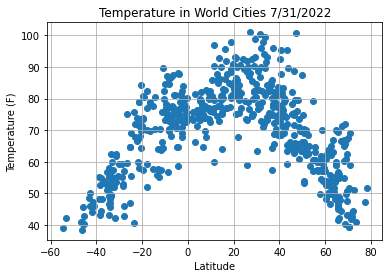

In [13]:
# Build a scatter plot for Temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities 7/31/2022")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## </span>Latitude vs. Humidity Plot

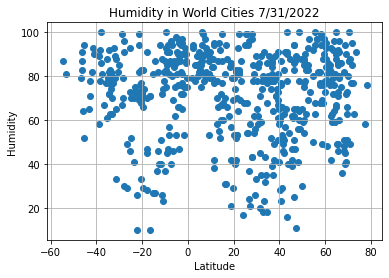

In [14]:
# Build a scatter plot for Humidity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities 7/31/2022")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## </span>Latitude vs. Cloudiness Plot

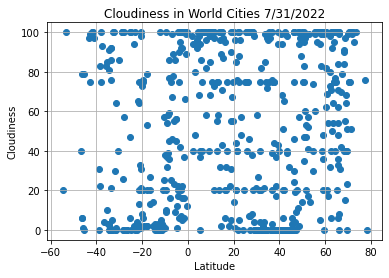

In [15]:
# Build a scatter plot for Cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities 7/31/2022")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## </span>Latitude vs. Wind Speed Plot

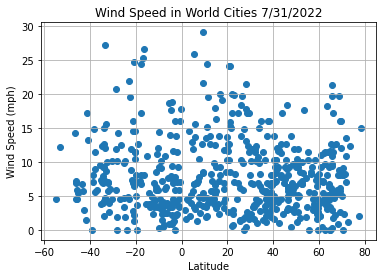

In [16]:
# Build a scatter plot for Wind Speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities 7/31/2022")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [17]:
#split city dataframe into two hemispheres 
north_df = city_data_df.loc[city_data_df['Latitude'] > 0]
south_df = city_data_df.loc[city_data_df['Latitude'] < 0]

In [18]:
north_df.head()

,City,Latitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Clyde River,70.4692,39.43,39.43,87,75,8.05,CA
2,Lagoa,39.0500,72.75,72.75,74,0,6.67,PT
7,Thompson,55.7435,64.56,64.56,63,100,0.00,CA
9,Cabo San Lucas,22.8909,90.52,94.60,69,96,7.00,MX
10,George Town,5.4112,79.75,81.90,83,40,3.44,MY


In [19]:
south_df.head()

,City,Latitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country
1,Mahébourg,-20.4081,70.09,70.25,73,75,11.50,MU
3,Airai,-8.9266,56.66,56.66,94,58,3.15,TL
4,Cape Town,-33.9258,51.67,53.91,77,0,12.66,ZA
5,Busselton,-33.6500,57.52,57.52,82,86,27.20,AU
6,Fayaoué,-20.6500,73.45,73.45,77,98,24.79,NC


## Max Temp

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

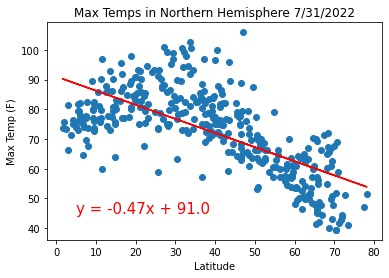

In [20]:
x_values = north_df['Latitude']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Max Temps in Northern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("MaxTempsNorth.png")

plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

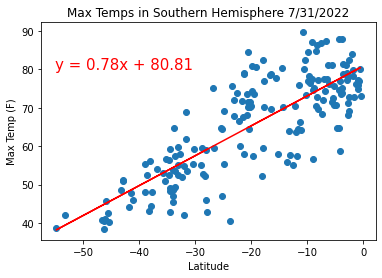

In [21]:
x_values = south_df['Latitude']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Max Temps in Southern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("MaxTempsSouth.png")

plt.show()

#### Max Temp Description - Overall the trend is a general increase in temp toward the equator, however as 
#### evidenced in the Norther Hemisphere by an arching of the plots the peak maximum of temperatures appear
#### roughly ten degrees higher at approx the Tropic of Cancer. 

## Humidity

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

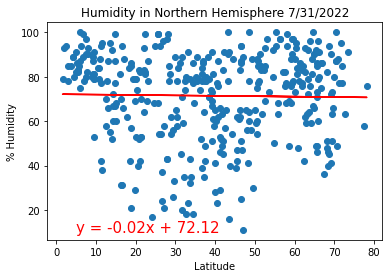

In [22]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Humidity in Northern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("HumidityNorth.png")

plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

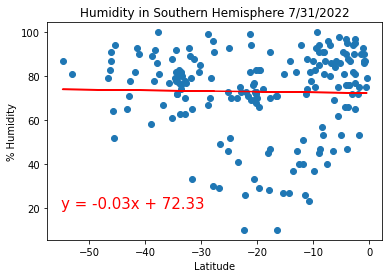

In [23]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Humidity in Southern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("HumiditySouth.png")

plt.show()

#### Humidity Description - Overall the trend is that there is less humidity south of the equator, and  
#### more humidity north of the equator. However as evidenced in both of these plots there does not appear 
#### to be any increase or decrease related to the equator, or approaching the equator.

## Cloudiness

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

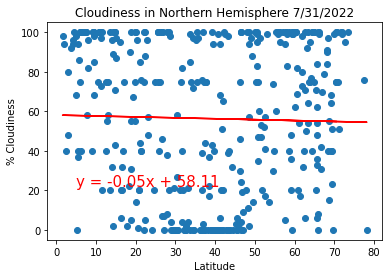

In [24]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Cloudiness in Northern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("CloudinessNorth.png")

plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

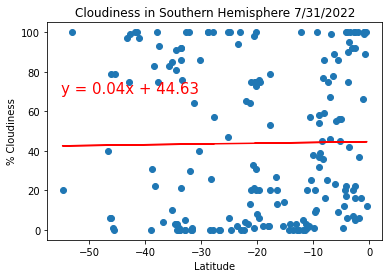

In [25]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,69),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Cloudiness in Southern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("CloudinessSouth.png")

plt.show()

#### Cloudiness Description - Overall the trend is that there are fewer clouds south of the equator, and  
#### more clouds north of the equator. This data logically corresponds well with the humidity data.

## Wind Speed

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

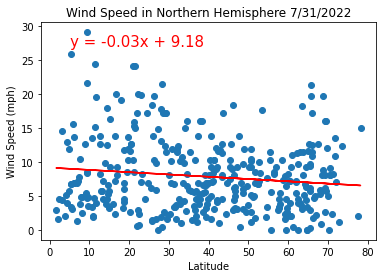

In [26]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed in Northern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("WindSpeedNorth.png")

plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

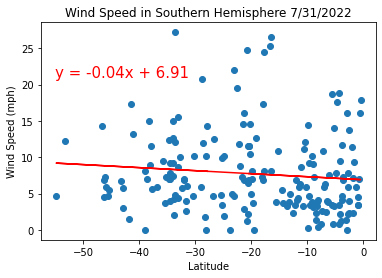

In [27]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed in Southern Hemisphere 7/31/2022")

# Save the figure
plt.savefig("WindSpeedSouth.png")

plt.show()

#### Wind Speed Description - Overall the trend is that wind speed has very little relation to the equator.   
#### Perhaps a very slight relationship in each of the hemispheres. However as evidenced in both of these 
#### plots the regression line trends in either hemisphere are very slight.